# Homework 1

## Louie Wang

## Practice loading in data


Using the file melb_data.csv load it into a pandas data frame

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('melb_data.csv')

## How many unique suburbs are there?

In [3]:
df_suburbs = df['Suburb']
df_unique_suburb = df_suburbs.drop_duplicates()
df_unique_suburb.shape[0]

'''
len(df['Suburb'].drop_duplicates())
'''

314

Output: 314

## How many unique properties are there?

In [4]:
df_properties = df['Address']
df_properties.drop_duplicates().shape[0]

'''
df_prop = df[['Address','Lattitude','Longitude']]
len(df_prop.drop_duplicates())
'''

13378

Output: 13378

## What is the mean price of a property in the Kensington suburb?

In [5]:
df_k = df[df['Suburb']=='Kensington']
df_k['Price'].mean()

831667.4358974359

Output: 831667.44

## What percentage of properties contain a YearBuilt value?

In [6]:
df_has_value = df[df['YearBuilt'].notnull()]
'{:.3%}'.format(df_has_value.shape[0]/df.shape[0])

'''
(1.0 - len(df[df['YearBuilt'].isnull()])/len(df)) * 100
'''

'60.420%'

Output: 60.42%

## Plot the Landsize as a histogram using 20 bins. Say something interesting about the graph. 

<AxesSubplot:>

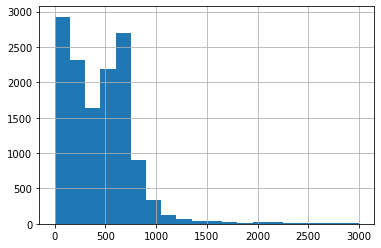

In [7]:
df_landsize = df['Landsize']
df_landsize.hist(bins=20,range=[0,3000])

'''
bins_edges = [0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1900,df['Landsize'].max()]
plt.hist(df['Landsize'], bins = bins_edge, facecolor = 'g')
plt.xlabel('Landsize')
plt.ylabel('Number of houses')
plt.xlim([0,2100])
plt.text(1150,500,'Last bin is properties > 1900')
plt.show()
'''

#The Landsize is extremely right skewed, meaning that the majority of the properties are within a small range of landsize, with very few being extremely large. 

## Plot a scatter plot of price as a function of BuildingArea using only rows that have a valid BuildingArea value

<AxesSubplot:xlabel='BuildingArea', ylabel='Price'>

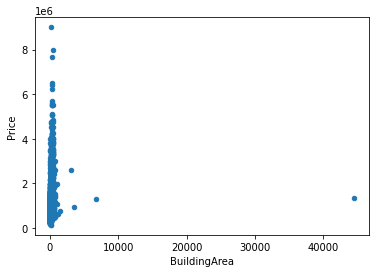

In [8]:
df2 = df[df['BuildingArea'].notnull()]
df2.plot.scatter(x='BuildingArea',y='Price')

'''
df_valid_area = df[-df['BuildingArea'].isnull()]
plt.plot(df_valid_area['Building Area'], df_valid_area['Price'], 'bo')
plt.xlable('Building Area')
plt.ylabel('Price')
plt.grid('on')
plt.xlim([0,1000])     #limit the range and omit certain properties
plt.text(625,5000000,'8 Properties not shown')
plt.show()
'''

## List the top 10 SellerG, and what percentage of properties they have listed 

I'm going to assume that the SellerG column is the name of the seller group, so "realtor" in US parlance.  So, that column is interpreted as the seller that listed the property.

In [9]:
df_sellerg = df['SellerG'].value_counts().to_frame().reset_index()
df_sellerg = df_sellerg.rename(columns={'index':'seller','SellerG':'counts'})

percent = []
for counts in df_sellerg['counts']:
    per = '{:.2%}'.format(counts/df.shape[0])
    percent.append(per)
df_sellerg['percent'] = percent
df_sellerg[:10]


'''
df_sellers = df['SellerG'].value_counts().to_frame().reset_index().rename(columns={'index':'SellerG','SellerG':'Count'})
df_sellers['Percent'] = df_sellers['Count']/len(df)*100
df_sellers[0:10]
'''

,seller,counts,percent
0,Nelson,1565,11.52%
1,Jellis,1316,9.69%
2,hockingstuart,1167,8.59%
3,Barry,1011,7.44%
4,Ray,701,5.16%
5,Marshall,659,4.85%
6,Buxton,632,4.65%
7,Biggin,393,2.89%
8,Brad,342,2.52%
9,Fletchers,301,2.22%


## Fix a problem
Your boss has told you that the number of rooms was calculated incorrectly systematically across the entire data set.  Add one room to the Rooms column using two methods:

 - a for loop, and
 - using a single statement

### (I put these two methods in two separate cells) ###

In [10]:
#for loop method
df_copy1 = df.copy()
for i in range(len(df_copy1)):
    df_copy1.loc[i,'Rooms'] += 1
    
'''
df_adjusted = df.copy()
for idx, row in df_adjusted.iterrows():
    df_adjusted.loc[idx,'Rooms'] = row['Rooms'] + 1
df_adjusted.loc[0:10,'Rooms']
'''

In [11]:
#single statement method
df_copy2 = df.copy()
df_copy2['Rooms'] = df_copy2['Rooms'].apply(lambda x: x+1)

'''
df_adjusted_vector = df.copy()
df_adjusted_vector['Rooms'] = df['Rooms'] + 1
df_adjusted_vector.loc[0:10,'Rooms']
'''

## What is the Address of the earliest built house in the data set?

In [12]:
df_time = df
res = df_time.nsmallest(1,'YearBuilt')['Address']
res.iloc[0]

'''
df[df['YearBuilt'] == df['YearBuilt'].min()]['Address']
'''

'5 Armstrong St'

Output: 5 Armstrong St

## Save a file 
The council member for Melbourne has asked for the information for their district.  Assume that there are legal restrcitions and we can only provide the council member the Suburb, Price, and Date from the CouncilArea "Melbourne" to the counsil person.  Export the file with only the allowed columns, and do not write and index column.

In [ ]:
df_saved = df.copy()
df_saved = df_saved[df_saved['CouncilArea'] == 'Melbourne']
df_saved = df_saved.loc[:,['Suburb','Price','Date']]
df_saved.to_csv('council.csv',index=False)

'''
df_melb = df[df['CouncilArea'] == 'Melbourne']
df_melb.to_csv('new_council_report.csv', index=False, columns=['Suburb','Price','Date','CouncilArea'])
'''